In [169]:
import numpy as np
import matplotlib.pyplot as plt


**Defining 6 arms**

In [170]:
def arm1():
    return np.random.normal(0, 1)

def arm2():
    return 3 if np.random.rand() < 0.5 else -4

def arm3():
    return np.random.poisson(2)

def arm4():
    return np.random.normal(1, 2)

def arm5():
    return np.random.exponential(1)

def arm6():
    arms = [arm1, arm2, arm3, arm4, arm5]
    return np.random.choice(arms)()

arms = [arm1, arm2, arm3, arm4, arm5, arm6]

**Defining Agent**

In [171]:
def run_simulation(eps, trials, episodes):
    rewards = np.zeros(episodes)
    max_reward = float("-inf")
    for episode in range(episodes):
        Q = np.zeros(len(arms))  # Estimated rewards
        N = np.zeros(len(arms))  # Number of times each arm is chosen
        total_reward = 0
        for trial in range(trials):
            if np.random.rand() < eps:
                action = np.random.choice(len(arms))  # Exploration
            else:
                action = np.argmax(Q)  # Exploitation
            reward = arms[action]()
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
            total_reward += reward
        rewards[episode] = total_reward
        max_reward = max(max_reward, total_reward)
    return rewards, max_reward

**Number of episode and trials in each episode**

In [172]:
trials = 100
episodes = 1000


**Data for ploting**

In [173]:
eps0_rewards, max_reward_eps0 = run_simulation(0, trials, episodes)
eps01_rewards, max_reward_eps01 = run_simulation(0.01, trials, episodes)
eps1_rewards, max_reward_eps1 = run_simulation(0.1, trials, episodes)

cumulative_eps0_rewards = np.cumsum(eps0_rewards)
cumulative_eps01_rewards = np.cumsum(eps01_rewards)
cumulative_eps1_rewards = np.cumsum(eps1_rewards)

window_size = 50
moving_avg_eps0_rewards = np.convolve(eps0_rewards, np.ones(window_size)/window_size, mode='valid')
moving_avg_eps01_rewards = np.convolve(eps01_rewards, np.ones(window_size)/window_size, mode='valid')
moving_avg_eps1_rewards = np.convolve(eps1_rewards, np.ones(window_size)/window_size, mode='valid')

**Max reward from different epsilon values**

In [174]:
print("Max reward for eps=0: ", max_reward_eps0)
print("Max reward for eps=0.01: ", max_reward_eps01)
print("Max reward for eps=o.1: ", max_reward_eps1)

Max reward for eps=0:  232.65624985177004
Max reward for eps=0.01:  235.35912665829557
Max reward for eps=o.1:  239.43376423501354


**Ploting 3 plots (Cmulative reward, Moving average reward, Total reward VS Episodes)**

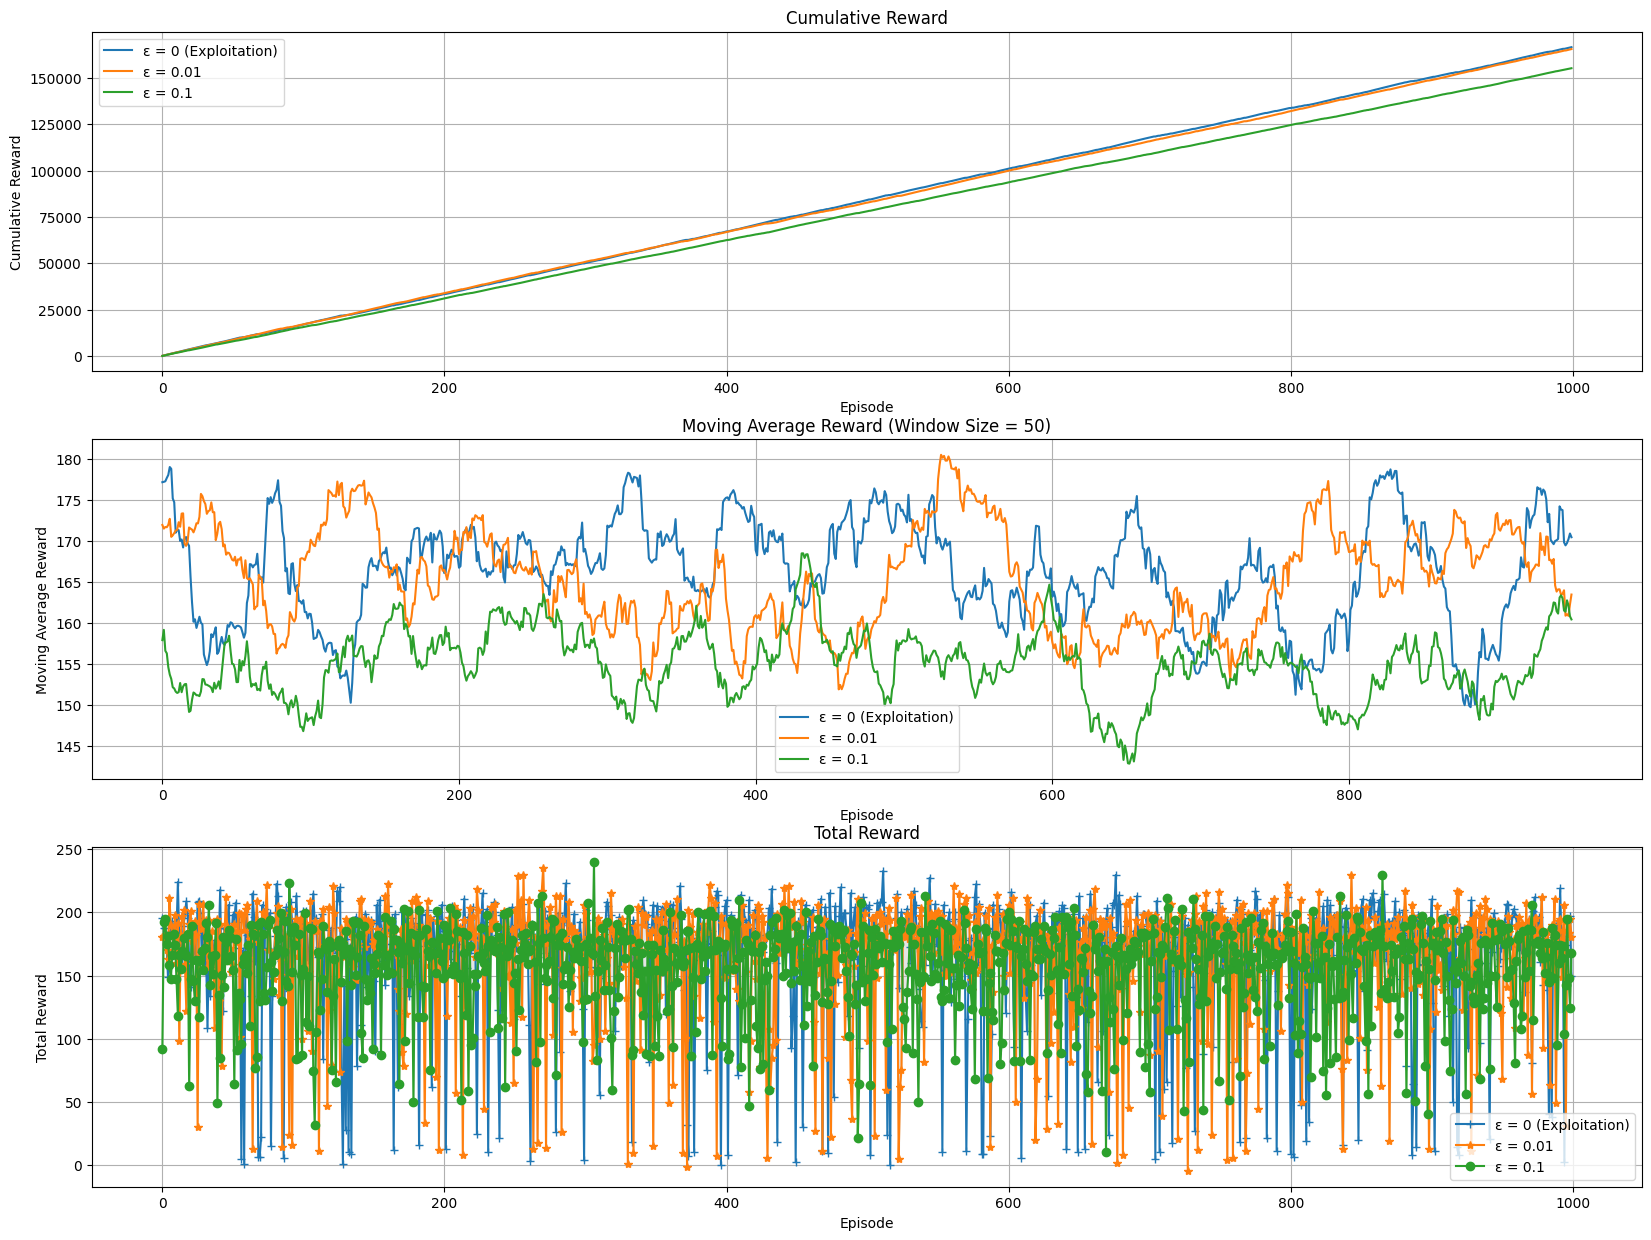

In [175]:
plt.figure(figsize=(20, 15))


plt.subplot(3, 1, 1)
plt.plot(cumulative_eps0_rewards, label='ε = 0 (Exploitation)')
plt.plot(cumulative_eps01_rewards, label='ε = 0.01')
plt.plot(cumulative_eps1_rewards, label='ε = 0.1')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(moving_avg_eps0_rewards, label='ε = 0 (Exploitation)')
plt.plot(moving_avg_eps01_rewards, label='ε = 0.01')
plt.plot(moving_avg_eps1_rewards, label='ε = 0.1')
plt.xlabel('Episode')
plt.ylabel('Moving Average Reward')
plt.title('Moving Average Reward (Window Size = {})'.format(window_size))
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(eps0_rewards, label='ε = 0 (Exploitation)', marker='+')
plt.plot(eps01_rewards, label='ε = 0.01', marker='*')
plt.plot(eps1_rewards, label='ε = 0.1', marker='o')
plt.fill_between(range(episodes), eps01_rewards, eps1_rewards, color='gray', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward')
plt.legend()
plt.grid(True)



plt.show()